In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/data.xlsx
/kaggle/input/invdata/data.xlsx


In [79]:
#Importing required libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
#Upload the dataset
data = pd.read_excel("/kaggle/input/dataset/data.xlsx")
data.head()

,Date,LOLC,JKH,COMB,HNB,SLT,HSEI,BROW,VALI
0,12/29/2023,360.00,191.00,95.5,170.0,93.0,11.5,4.7,38.5
1,12/28/2023,356.00,191.50,94.5,166.5,93.7,11.5,4.6,37.7
2,12/27/2023,359.75,191.75,93.1,165.0,93.6,11.5,4.7,38.9
3,12/22/2023,362.50,189.00,93.0,165.0,91.7,11.6,4.6,37.7
4,12/21/2023,362.00,190.25,93.0,167.0,92.6,11.8,4.7,37.9


In [81]:
assets =['LOLC','JKH','COMB','HNB','SLT','HSEI','BROW','VALI']

In [82]:
data['HSEI'] = data['HSEI'].replace(0, 22.3)
#Convert Date column to datetime
data['Date']=pd.to_datetime(data['Date'])
#Set Date column as index
data.set_index('Date', inplace=True)


**Daily Returns by Log % of Prices**

In [83]:
#Daily Returns by Log % of Prices
log_stock_returns = data.pct_change().apply(lambda x:np.log(1+x))
log_stock_returns.fillna(0, inplace=True)
log_stock_returns.head()

,LOLC,JKH,COMB,HNB,SLT,HSEI,BROW,VALI
Date,,,,,,,,
2023-12-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-28,-0.011173,0.002614,-0.010526,-0.020803,0.007499,0.000000,-0.021506,-0.020998
2023-12-27,0.010479,0.001305,-0.014926,-0.009050,-0.001068,0.000000,0.021506,0.031334
2023-12-22,0.007615,-0.014445,-0.001075,0.000000,-0.020508,0.008658,-0.021506,-0.031334
2023-12-21,-0.001380,0.006592,0.000000,0.012048,0.009767,0.017094,0.021506,0.005291


**Covariance Matrix of returns (252 Days)**


In [84]:
#Covariance Matrix (252 Days)
covariance_matrix = log_stock_returns.cov()*252
covariance_matrix

,LOLC,JKH,COMB,HNB,SLT,HSEI,BROW,VALI
LOLC,2.652156,0.055493,0.058795,0.053734,0.008381,0.073946,0.258828,0.206006
JKH,0.055493,0.084938,0.041034,0.032860,0.031326,0.024857,0.059727,0.058620
COMB,0.058795,0.041034,0.102217,0.059698,0.027308,0.019630,0.073474,0.072791
HNB,0.053734,0.032860,0.059698,0.100222,0.032456,0.016935,0.070396,0.070746
SLT,0.008381,0.031326,0.027308,0.032456,0.305897,0.038312,0.098861,0.083357
HSEI,0.073946,0.024857,0.019630,0.016935,0.038312,0.117691,0.075202,0.062052
BROW,0.258828,0.059727,0.073474,0.070396,0.098861,0.075202,0.548278,0.217620
VALI,0.206006,0.058620,0.072791,0.070746,0.083357,0.062052,0.217620,0.384290


**Correlation Matrix of returns (252 Days)**


In [85]:
#Correlation Matrix
correlation_matrix = log_stock_returns.corr()*252
correlation_matrix

,LOLC,JKH,COMB,HNB,SLT,HSEI,BROW,VALI
LOLC,252.000000,29.463567,28.456387,26.264518,2.344915,33.353602,54.089264,51.422173
JKH,29.463567,252.000000,110.975564,89.751039,48.974767,62.651176,69.746535,81.764101
COMB,28.456387,110.975564,252.000000,148.633903,38.917427,45.100634,78.212235,92.551883
HNB,26.264518,89.751039,148.633903,252.000000,46.711644,39.294260,75.677159,90.843396
SLT,2.344915,48.974767,38.917427,46.711644,252.000000,50.882873,60.833036,61.267164
HSEI,33.353602,62.651176,45.100634,39.294260,50.882873,252.000000,74.603200,73.527924
BROW,54.089264,69.746535,78.212235,75.677159,60.833036,74.603200,252.000000,119.472856
VALI,51.422173,81.764101,92.551883,90.843396,61.267164,73.527924,119.472856,252.000000


**Calculating Equal Weights**

In [86]:
#Calculation of Equal Weights
num_stocks=8
weights = np.array([1/num_stocks]*num_stocks)

**Calculating Returns for equal portfolio weights**

In [87]:
#Calculating Expected Retruns
Expected_stock_returns = data.resample('YE').last().pct_change().mean()
Expected_stock_returns

LOLC    1.640520
JKH     0.052686
COMB    0.133578
HNB     0.167050
SLT     0.328819
HSEI   -0.070923
BROW    0.462443
VALI    0.527022
dtype: float64

In [88]:
#Calculating Portfolio Return Assuming Equal Weight for Each company stock
Expected_portfolio_return = (weights*Expected_stock_returns).sum()
Expected_portfolio_return

0.40514930625642626

In [89]:
#Portfolio Risk Calculation

#Computing Portfolio Variance
portfolio_variance = np.transpose(weights)@covariance_matrix@weights

#Computing Portfolio Volatality(Risk)
portfolio_volatality = np.sqrt(portfolio_variance)

print("Portfolio Variance is ,", portfolio_variance)
print("Portfolio Volatality(Risk) is ,", portfolio_volatality)

Portfolio Variance is , 0.1290715425606499
Portfolio Volatality(Risk) is , 0.35926528159655213


In [90]:
#Creating 2000 portfolios to allocate different weights for the stocks and obtain different returns and variances for the multiple portfolio.

#Initialize an empty list for storing the portfolio returns
portfolioo_returns = []
#Initialize an empty list for storing the portfolio volatality
portfolioo_volatality= []
#Initialize an empty list for storing the portfolio weights
portfolioo_weights=[]

num_assets = len(data.columns)
num_portfolios = 2000

#Computing the individual asset returns
individual_stock_returns= data.resample('YE').last().pct_change().mean()

In [91]:
for port in range(num_portfolios):
    
    #Create random weight combinations
    weights = np.random.random(num_assets)
    
    #Normalize the weights to ensure they sum up to 1
    weights=weights/np.sum(weights)
    portfolioo_weights.append(weights)
    
    #Calculate the returns 
    #Dot-product of individual expected returns of assets and its weights
    returns = np.dot(weights, individual_stock_returns)
    portfolioo_returns.append(returns)
    
    #Computing Portfolio Variance
    var = covariance_matrix.mul(weights, axis=0).mul(weights,axis=1).sum().sum()
    
    #Finding the standard deviation on a daily basis
    sd = np.sqrt(var)
    
    #Annualizing the standard deviation
    annual_sd=sd*np.sqrt(252)
    portfolioo_volatality.append(annual_sd)

In [92]:
#Storing returns and volatality
dataset = {'Returns':portfolioo_returns, 'Volatility':portfolioo_volatality}

for counter, symbol in enumerate(data.columns.tolist()):
    dataset[symbol+' weight'] = [w[counter] for w in portfolioo_weights]

In [93]:
portfolio_data=pd.DataFrame(dataset)
portfolio_data.head()

,Returns,Volatility,LOLC weight,JKH weight,COMB weight,HNB weight,SLT weight,HSEI weight,BROW weight,VALI weight
0,0.461171,6.904045,0.201390,0.180582,0.207892,0.009394,0.007141,0.189566,0.069692,0.134344
1,0.550624,7.922034,0.255069,0.273109,0.048035,0.115317,0.018841,0.110768,0.007631,0.171230
2,0.436759,6.020695,0.119602,0.140141,0.009475,0.366001,0.011241,0.020568,0.107797,0.225176
3,0.338535,5.044796,0.055460,0.028056,0.200754,0.144354,0.193829,0.104073,0.082648,0.190826
4,0.204214,4.179010,0.030679,0.217587,0.230764,0.228384,0.006856,0.122287,0.097182,0.066261


Text(0, 0.5, 'Expected Returns')

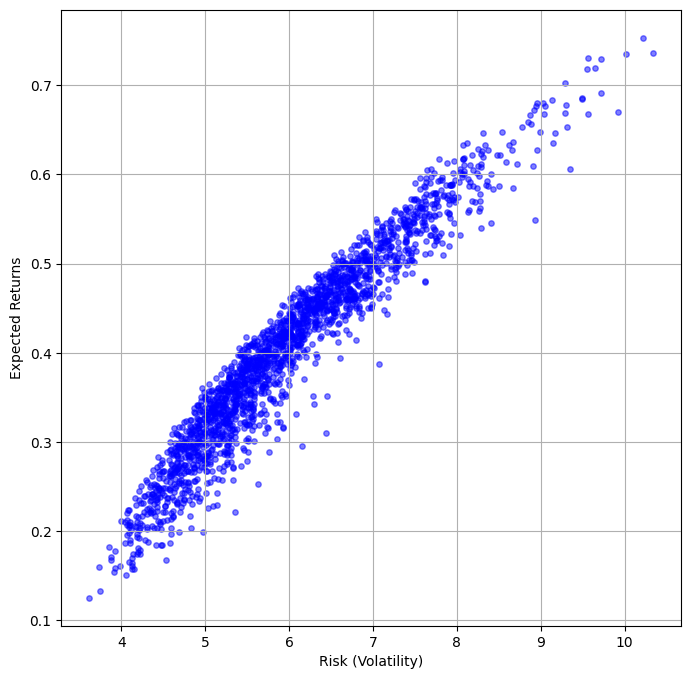

In [94]:
portfolio_data.plot.scatter(x='Volatility',y='Returns',marker='o', color='b', s=15, alpha=0.5, grid=True, figsize=[8,8])
plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Returns")

In [95]:
#Find the minimum volatality point
minimum_volatility_portfolio = portfolio_data.iloc[portfolio_data['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
minimum_volatility_portfolio

Returns        0.125162
Volatility     3.621234
LOLC weight    0.011803
JKH weight     0.279425
COMB weight    0.075862
HNB weight     0.279313
SLT weight     0.081642
HSEI weight    0.223573
BROW weight    0.034105
VALI weight    0.014276
Name: 487, dtype: float64

/tmp/ipykernel_33/3352568197.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(minimum_volatility_portfolio[1], minimum_volatility_portfolio[0], color='r', marker='*', s=500)


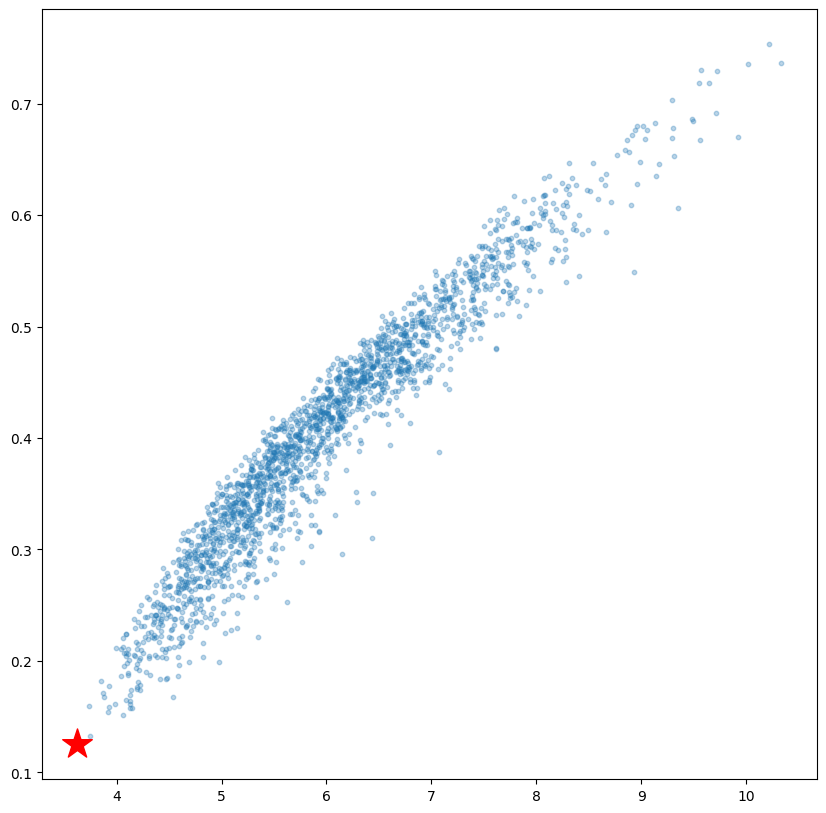

In [96]:
# plotting the minimum volatility portfolio point in graph
plt.subplots(figsize=[10,10])
plt.scatter(portfolio_data['Volatility'], portfolio_data['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(minimum_volatility_portfolio[1], minimum_volatility_portfolio[0], color='r', marker='*', s=500)

In [97]:
#Finding the optimal risky portfolio
# Finding the optimal portfolio
risk_factor = 0.01
optimal_risky_portfolio = portfolio_data.iloc[((portfolio_data['Returns']-risk_factor)/portfolio_data['Volatility']).idxmax()]
optimal_risky_portfolio

Returns        0.617349
Volatility     7.788270
LOLC weight    0.234089
JKH weight     0.041237
COMB weight    0.005489
HNB weight     0.225077
SLT weight     0.262083
HSEI weight    0.021189
BROW weight    0.046040
VALI weight    0.164796
Name: 1776, dtype: float64

/tmp/ipykernel_33/245394105.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(minimum_volatility_portfolio[1], minimum_volatility_portfolio[0], color='r', marker='*', s=500)
/tmp/ipykernel_33/245394105.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(optimal_risky_portfolio[1], optimal_risky_portfolio[0], color='g', marker='*', s=500)


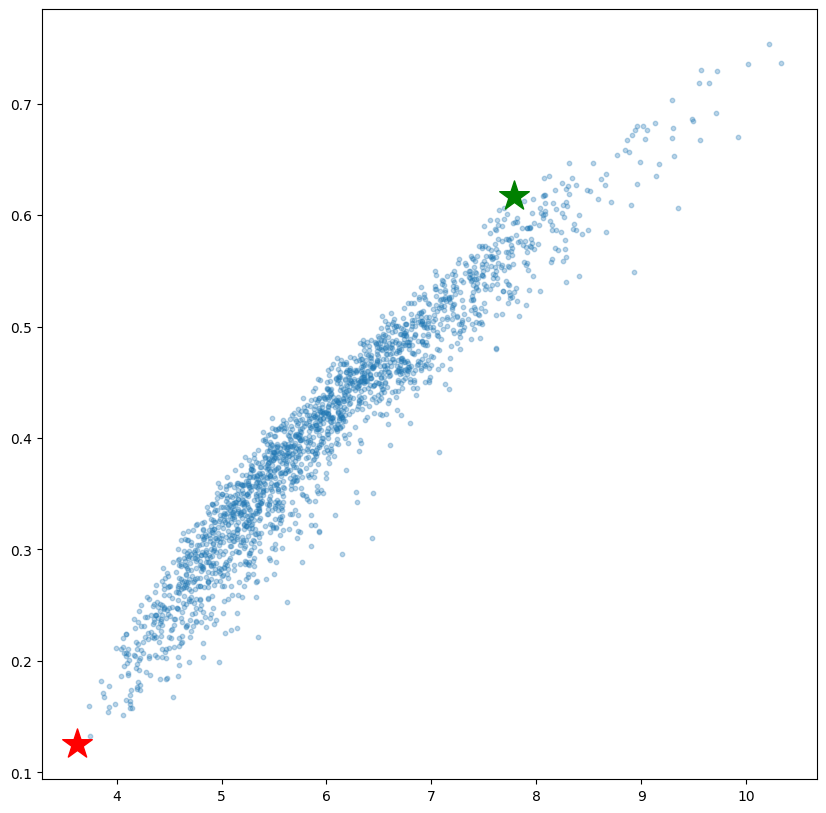

In [98]:
# Plotting optimal risky portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolio_data['Volatility'], portfolio_data['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(minimum_volatility_portfolio[1], minimum_volatility_portfolio[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_portfolio[1], optimal_risky_portfolio[0], color='g', marker='*', s=500)